In [1]:
import matplotlib.pyplot as plt

#packages
import numpy
np = numpy
import tensorflow as tf
from tensorflow.core.example import example_pb2

#utils
import os
import random
import pickle
import struct
import time
#from generators import *

In [2]:
#specify models to plot
system_dir= '/home/donald/Documents/MT/implementation-experiments'#'/home/oala/Documents/MT/implementation-experiments'
ow_on_pseudorandom = ['ow_on_pseudorandom',system_dir+'/exciting-crazy/experiments/ow-on-pseudorandom/1/']
ow_on_generator = ['ow_on_generator',system_dir+'/exciting-crazy/experiments/ow-on-generator/1/']
ow_on_uniform = ['ow_on_uniform',system_dir+'/exciting-crazy/experiments/ow-on-uniform/1/']
tw_on_pseudorandom = ['tw_on_pseudorandom',system_dir+'/exciting-crazy/experiments/tw-on-pseudorandom/1/']
tw_on_generator = ['tw_on_generator',system_dir+'/exciting-crazy/experiments/tw-on-generator/1/']
tw_on_uniform = ['tw_on_uniform',system_dir+'/exciting-crazy/experiments/tw-on-uniform/1/']

model_paths = [tw_on_pseudorandom, tw_on_generator, tw_on_uniform, ow_on_pseudorandom, ow_on_generator, ow_on_uniform]

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels

plotting on_pseudorandom
losses
accs


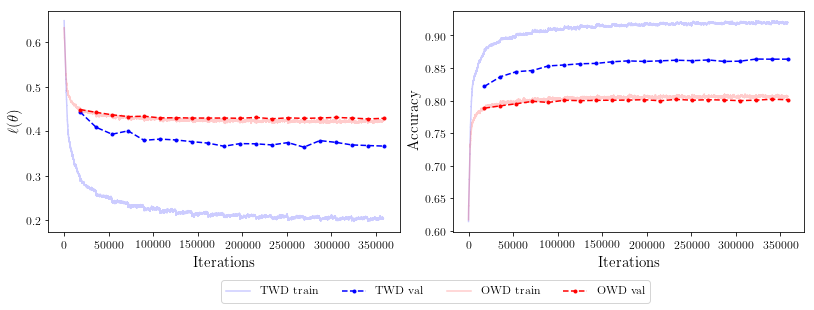

plotting on_generator
losses
accs


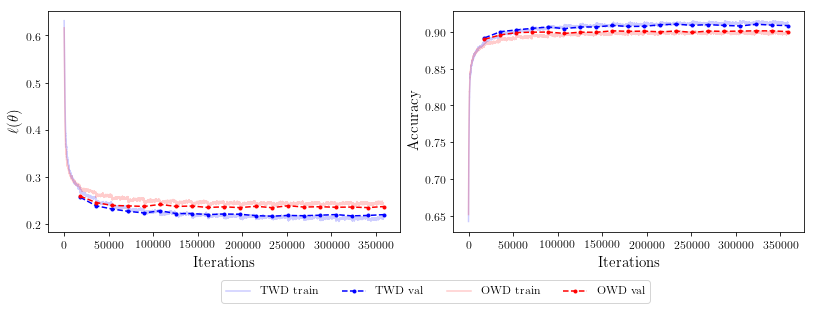

In [44]:

N=500
epoch_size = 17944
alpha = 0.2
alpha2 = 0.25
alpha3 = 0.05

#first twd then owd
for i in range(2):
    
    all_losses_twd = []
    all_accs_twd = []
    all_val_losses_twd = []
    all_val_accs_twd = []
    all_losses_owd = []
    all_accs_owd = []
    all_val_losses_owd =[]
    all_val_accs_owd = []
    
    for j in range(2,11,1):
    #first twd
        model_name = model_paths[i][0]
        with open(model_paths[i][1][:-2]+str(j)+'/'+'losses.pickle', 'rb') as handle: losses_twd = pickle.load(handle)
        with open(model_paths[i][1][:-2]+str(j)+'/'+'accs.pickle', 'rb') as handle: accs_twd = pickle.load(handle)
        val_losses_twd = numpy.loadtxt(model_paths[i][1][:-2]+str(j)+'/'+'run_.-tag-val_loss.csv', delimiter=',', skiprows=1, usecols=(1,2))
        val_accs_twd = numpy.loadtxt(model_paths[i][1][:-2]+str(j)+'/'+'run_.-tag-val_acc.csv', delimiter=',', skiprows=1, usecols=(1,2))
        
        epoch_style = (val_losses_twd[:,0]+ 1)*epoch_size
        
        val_losses_twd = val_losses_twd[:,1]
        val_accs_twd = val_accs_twd[:,1]
        
        all_losses_twd.append(losses_twd)
        all_accs_twd.append(accs_twd)
        all_val_losses_twd.append(val_losses_twd)
        all_val_accs_twd.append(val_accs_twd)

        #now owd
        model_name = model_paths[i+3][0]
        with open(model_paths[i+3][1][:-2]+str(j)+'/'+'losses.pickle', 'rb') as handle: losses_owd = pickle.load(handle)
        with open(model_paths[i+3][1][:-2]+str(j)+'/'+'accs.pickle', 'rb') as handle: accs_owd = pickle.load(handle)
        val_losses_owd = numpy.loadtxt(model_paths[i+3][1][:-2]+str(j)+'/'+'run_.-tag-val_loss.csv', delimiter=',', skiprows=1, usecols=(1,2))
        val_accs_owd = numpy.loadtxt(model_paths[i+3][1][:-2]+str(j)+'/'+'run_.-tag-val_acc.csv', delimiter=',', skiprows=1, usecols=(1,2))
        val_losses_owd = val_losses_owd[:,1]
        val_accs_owd = val_accs_owd[:,1]
        
        all_losses_owd.append(losses_owd)
        all_accs_owd.append(accs_owd)
        all_val_losses_owd.append(val_losses_owd)
        all_val_accs_owd.append(val_accs_owd)
    
    #stacking
    all_losses_twd = numpy.stack(all_losses_twd)
    all_accs_twd = numpy.stack(all_accs_twd)
    all_val_losses_twd = numpy.stack(all_val_losses_twd)
    all_val_accs_twd = numpy.stack(all_val_accs_twd)
    all_losses_owd = numpy.stack(all_losses_owd)
    all_accs_owd = numpy.stack(all_accs_owd)
    all_val_losses_owd = numpy.stack(all_val_losses_owd)
    all_val_accs_owd = numpy.stack(all_val_accs_owd)
    
    #means
    all_losses_twd_means = numpy.mean(all_losses_twd, axis=0)
    all_accs_twd_means = numpy.mean(all_accs_twd, axis=0)
    all_val_losses_twd_means = numpy.mean(all_val_losses_twd, axis=0)
    all_val_accs_twd_means = numpy.mean(all_val_accs_twd, axis=0)
    all_losses_owd_means = numpy.mean(all_losses_owd, axis=0)
    all_accs_owd_means = numpy.mean(all_accs_owd, axis=0)
    all_val_losses_owd_means = numpy.mean(all_val_losses_owd, axis=0)
    all_val_accs_owd_means = numpy.mean(all_val_accs_owd, axis=0)
    
    #std
    all_losses_twd_std = numpy.std(all_losses_twd, axis=0)
    all_accs_twd_std = numpy.std(all_accs_twd, axis=0)
    all_val_losses_twd_std = numpy.std(all_val_losses_twd, axis=0)
    all_val_accs_twd_std = numpy.std(all_val_accs_twd, axis=0)
    all_losses_owd_std = numpy.std(all_losses_owd, axis=0)
    all_accs_owd_std = numpy.std(all_accs_owd, axis=0)
    all_val_losses_owd_std = numpy.std(all_val_losses_owd, axis=0)
    all_val_accs_owd_std = numpy.std(all_val_accs_owd, axis=0)
    
    print('plotting '+model_name[3:])
    
    print('losses')
    #plt.plot(losses)
    #plt.figure(figsize=(10,7))
    
    plt.figure(figsize=(15,10))
    #first twd
    plt.subplot(221)
    x = all_losses_twd_means
    
    #plt.fill_between(len(x), x-all_losses_twd_std, x+all_losses_twd_std,color ='blue', alpha=alpha2)
    #plt.fill_between(epoch_style, all_val_losses_twd_means-all_val_losses_twd_std,
                     #all_val_losses_twd_means+all_val_losses_twd_std,color ='blue', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{TWD train}$', color ='blue', alpha=alpha)
    plt.plot(epoch_style, all_val_losses_twd_means, label=r'$\textrm{TWD val}$',color ='blue', ls='--', marker='o', markersize=3)
    
    #now owd
    x = all_losses_owd_means
    
    #plt.fill_between(len(x), x-all_losses_owd_std, x+all_losses_owd_std,color ='red', alpha=alpha2)
    #plt.fill_between(epoch_style, all_val_losses_owd_means-all_val_losses_owd_std,
                     #all_val_losses_owd_means+all_val_losses_owd_std,color ='red', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{OWD train}$', color ='red', alpha=alpha)
    plt.plot(epoch_style, all_val_losses_owd_means, label=r'$\textrm{OWD val}$', color ='red', ls='--', marker='o', markersize=3)
    
    plt.xlabel(r'$\mathrm{Iterations}$',fontsize=15)
    plt.ylabel(r'$\ell (\theta)$',fontsize=15)
    #plt.ylim(ymin=0)
    #plt.legend(loc=1, fontsize=13)
    #plt.savefig(model_name+'_losses'+'.png', transparent=True)
    #plt.show()
    
    print('accs')
    #plt.plot(accs)
    #plt.figure(figsize=(10,7))
    #plt.figure()
    #first twd
    plt.subplot(222)
    x = all_accs_twd_means
    
    #plt.fill_between(numpy.arange(len(x)), x-all_accs_twd_std, x+all_accs_twd_std,color ='blue', alpha=alpha3)
    #plt.fill_between(epoch_style, all_val_accs_twd_means-all_val_accs_twd_std,
                     #all_val_accs_twd_means+all_val_accs_twd_std,color ='blue', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{TWD train}$',color ='blue', alpha=alpha)
    plt.plot(epoch_style, all_val_accs_twd_means, label=r'$\textrm{TWD val}$',color ='blue', ls='--', marker='o', markersize=3)
    
    #now owd
    x = all_accs_owd_means
    
    #plt.fill_between(len(x), x-all_accs_owd_std, x+all_accs_owd_std,color ='red', alpha=alpha2)
    #plt.fill_between(epoch_style, all_val_accs_owd_means-all_val_accs_owd_std,
                     #all_val_accs_owd_means+all_val_accs_owd_std,color ='red', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{OWD train}$', color ='red', alpha=alpha)
    plt.plot(epoch_style, all_val_accs_owd_means, label=r'$\textrm{OWD val}$', color ='red', ls='--', marker='o', markersize=3)
    
    #plt.ylim(ymin=0.6,ymax=1.05)
    plt.xlabel(r'$\mathrm{Iterations}$',fontsize=15)
    plt.ylabel(r'$\mathrm{Accuracy}$',fontsize=15)
    #plt.legend(loc=4, fontsize=13)
    
    plt.legend(bbox_to_anchor=(0.8, 0.16),
           ncol=4, mode=None, borderaxespad=7,fontsize='large')
    plt.subplots_adjust(left=0.2, wspace=0.15, top=0.8)
    #plt.yticks(np.arange(0.65, 1.01, 0.05))
    plt.savefig(model_name[6:]+'.png', transparent=True,bbox_inches='tight', dpi=300)
    plt.show()

In [38]:
print(all_val_accs_owd_means)
print(all_val_accs_owd_std)
print(all_val_accs_twd_means)
print(all_val_accs_twd_std)

[0.87967066 0.88573727 0.88912426 0.88923278 0.889375   0.88785179
 0.88933758 0.88932635 0.89096183 0.89053892 0.89053518 0.88975673
 0.89084207 0.88933383 0.89104789 0.8906961  0.89103294 0.8911976
 0.89128368 0.89016467]
[0.03135469 0.03023024 0.02944471 0.0309992  0.03094941 0.03017287
 0.03059919 0.03030387 0.03124372 0.03037183 0.03129368 0.03070946
 0.03062718 0.02981237 0.02993955 0.03006457 0.02995334 0.03037794
 0.0300054  0.03038713]
[0.89186003 0.89965943 0.90188997 0.90384731 0.90588698 0.90422905
 0.90639222 0.90601422 0.90802769 0.90721182 0.90719686 0.90955465
 0.91012725 0.90879491 0.90924774 0.90826348 0.90785928 0.91002619
 0.90877994 0.90834956]
[0.00401498 0.00276756 0.00335469 0.00316568 0.00242375 0.00373355
 0.00203262 0.00267609 0.00191119 0.0014661  0.00312813 0.00159283
 0.00125395 0.00203381 0.00208733 0.00258238 0.00336976 0.00168234
 0.00157384 0.00195017]


In [20]:
print(numpy.argmax(all_losses_twd_std))
print(numpy.argmax(all_losses_owd_std))

print(all_losses_twd_std[330794])
print(all_losses_owd_std[171672])

print(len(all_losses_twd_std))
print(len(all_losses_owd_std))

print(numpy.argmin(all_losses_twd_std))
print(numpy.argmin(all_losses_owd_std))

print(all_losses_twd_std[11])
print(all_losses_owd_std[0])

print(len(all_losses_twd_std))
print(len(all_losses_owd_std))

330794
171672
0.25343406
0.25309008
358880
358880
11
0
0.008734534
0.0077457624
358880
358880


plotting on_uniform
losses
accs


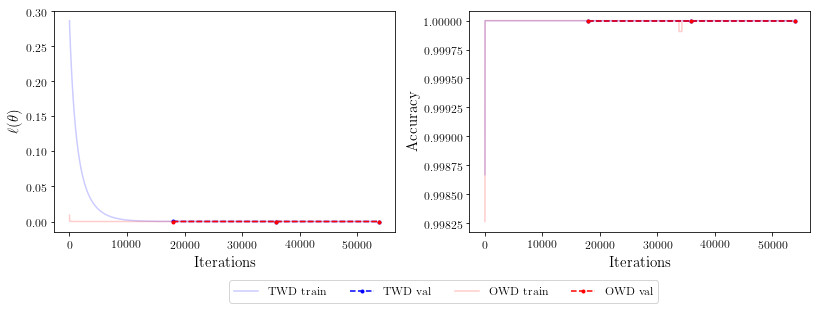

In [45]:
for i in [2]:
    
    all_losses_twd = []
    all_accs_twd = []
    all_val_losses_twd = []
    all_val_accs_twd = []
    all_losses_owd = []
    all_accs_owd = []
    all_val_losses_owd =[]
    all_val_accs_owd = []
    
    for j in range(1,11,1):
        #first twd
        model_name = model_paths[i][0]
        with open(model_paths[i][1][:-2]+str(j)+'/'+'losses.pickle', 'rb') as handle: losses_twd = pickle.load(handle)
        with open(model_paths[i][1][:-2]+str(j)+'/'+'accs.pickle', 'rb') as handle: accs_twd = pickle.load(handle)
        val_losses_twd = numpy.loadtxt(model_paths[i][1][:-2]+str(j)+'/'+'run_.-tag-val_loss.csv', delimiter=',', skiprows=1, usecols=(1,2))
        val_accs_twd = numpy.loadtxt(model_paths[i][1][:-2]+str(j)+'/'+'run_.-tag-val_acc.csv', delimiter=',', skiprows=1, usecols=(1,2))
        
        epoch_style = (val_losses_twd[:,0] + 1)*epoch_size
        
        val_losses_twd = val_losses_twd[:,1]
        val_accs_twd = val_accs_twd[:,1]
        
        all_losses_twd.append(losses_twd)
        all_accs_twd.append(accs_twd)
        all_val_losses_twd.append(val_losses_twd)
        all_val_accs_twd.append(val_accs_twd)

        #now owd
        model_name = model_paths[i+3][0]
        with open(model_paths[i+3][1][:-2]+str(j)+'/'+'losses.pickle', 'rb') as handle: losses_owd = pickle.load(handle)
        with open(model_paths[i+3][1][:-2]+str(j)+'/'+'accs.pickle', 'rb') as handle: accs_owd = pickle.load(handle)
        val_losses_owd = numpy.loadtxt(model_paths[i+3][1][:-2]+str(j)+'/'+'run_.-tag-val_loss.csv', delimiter=',', skiprows=1, usecols=(1,2))
        val_accs_owd = numpy.loadtxt(model_paths[i+3][1][:-2]+str(j)+'/'+'run_.-tag-val_acc.csv', delimiter=',', skiprows=1, usecols=(1,2))
        val_losses_owd = val_losses_owd[:,1]
        val_accs_owd = val_accs_owd[:,1]
        
        all_losses_owd.append(losses_owd)
        all_accs_owd.append(accs_owd)
        all_val_losses_owd.append(val_losses_owd)
        all_val_accs_owd.append(val_accs_owd)
    
    #stacking
    all_losses_twd = numpy.stack(all_losses_twd)
    all_accs_twd = numpy.stack(all_accs_twd)
    all_val_losses_twd = numpy.stack(all_val_losses_twd)
    all_val_accs_twd = numpy.stack(all_val_accs_twd)
    all_losses_owd = numpy.stack(all_losses_owd)
    all_accs_owd = numpy.stack(all_accs_owd)
    all_val_losses_owd = numpy.stack(all_val_losses_owd)
    all_val_accs_owd = numpy.stack(all_val_accs_owd)
    
    #means
    all_losses_twd_means = numpy.mean(all_losses_twd, axis=0)
    all_accs_twd_means = numpy.mean(all_accs_twd, axis=0)
    all_val_losses_twd_means = numpy.mean(all_val_losses_twd, axis=0)
    all_val_accs_twd_means = numpy.mean(all_val_accs_twd, axis=0)
    all_losses_owd_means = numpy.mean(all_losses_owd, axis=0)
    all_accs_owd_means = numpy.mean(all_accs_owd, axis=0)
    all_val_losses_owd_means = numpy.mean(all_val_losses_owd, axis=0)
    all_val_accs_owd_means = numpy.mean(all_val_accs_owd, axis=0)
    
    #std
    all_losses_twd_std = numpy.std(all_losses_twd, axis=0)
    all_accs_twd_std = numpy.std(all_accs_twd, axis=0)
    all_val_losses_twd_std = numpy.std(all_val_losses_twd, axis=0)
    all_val_accs_twd_std = numpy.std(all_val_accs_twd, axis=0)
    all_losses_owd_std = numpy.std(all_losses_owd, axis=0)
    all_accs_owd_std = numpy.std(all_accs_owd, axis=0)
    all_val_losses_owd_std = numpy.std(all_val_losses_owd, axis=0)
    all_val_accs_owd_std = numpy.std(all_val_accs_owd, axis=0)
    
    
    print('plotting '+model_name[3:])
    
    print('losses')
    #plt.plot(losses)
    #plt.figure(figsize=(10,7))
    
    plt.figure(figsize=(15,10))
    #first twd
    plt.subplot(221)
    x = all_losses_twd_means
    
    #plt.fill_between(len(x), x-all_losses_twd_std, x+all_losses_twd_std,color ='blue', alpha=alpha2)
    #plt.fill_between(epoch_style, all_val_losses_twd_means-all_val_losses_twd_std,
                     #all_val_losses_twd_means+all_val_losses_twd_std,color ='blue', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{TWD train}$', color ='blue', alpha=alpha)
    plt.plot(epoch_style, all_val_losses_twd_means, label=r'$\textrm{TWD val}$',color ='blue', ls='--', marker='o', markersize=3)
    
    #now owd
    x = all_losses_owd_means
    
    #plt.fill_between(len(x), x-all_losses_owd_std, x+all_losses_owd_std,color ='red', alpha=alpha2)
    #plt.fill_between(epoch_style, all_val_losses_owd_means-all_val_losses_owd_std,
                     #all_val_losses_owd_means+all_val_losses_owd_std,color ='red', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{OWD train}$', color ='red', alpha=alpha)
    plt.plot(epoch_style, all_val_losses_owd_means, label=r'$\textrm{OWD val}$', color ='red', ls='--', marker='o', markersize=3)
    
    plt.xlabel(r'$\mathrm{Iterations}$',fontsize=15)
    plt.ylabel(r'$\ell (\theta)$',fontsize=15)
    #plt.ylim(ymin=0)
    #plt.legend(loc=1, fontsize=13)
    #plt.savefig(model_name+'_losses'+'.png', transparent=True)
    #plt.show()
    
    print('accs')
    #plt.plot(accs)
    #plt.figure(figsize=(10,7))
    #plt.figure()
    #first twd
    plt.subplot(222)
    x = all_accs_twd_means
    
    #plt.fill_between(numpy.arange(len(x)), x-all_accs_twd_std, x+all_accs_twd_std,color ='blue', alpha=alpha3)
    #plt.fill_between(epoch_style, all_val_accs_twd_means-all_val_accs_twd_std,
                     #all_val_accs_twd_means+all_val_accs_twd_std,color ='blue', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{TWD train}$',color ='blue', alpha=alpha)
    plt.plot(epoch_style, all_val_accs_twd_means, label=r'$\textrm{TWD val}$',color ='blue', ls='--', marker='o', markersize=3)
    
    #now owd
    x = all_accs_owd_means
    
    #plt.fill_between(len(x), x-all_accs_owd_std, x+all_accs_owd_std,color ='red', alpha=alpha2)
    #plt.fill_between(epoch_style, all_val_accs_owd_means-all_val_accs_owd_std,
                     #all_val_accs_owd_means+all_val_accs_owd_std,color ='red', alpha=alpha2)
    
    plt.plot(np.convolve(x, np.ones((N,))/N, mode='valid'), label=r'$\textrm{OWD train}$', color ='red', alpha=alpha)
    plt.plot(epoch_style, all_val_accs_owd_means, label=r'$\textrm{OWD val}$', color ='red', ls='--', marker='o', markersize=3)
    
    #plt.ylim(ymin=0.6,ymax=1.05)
    plt.xlabel(r'$\mathrm{Iterations}$',fontsize=15)
    plt.ylabel(r'$\mathrm{Accuracy}$',fontsize=15)
    #plt.legend(loc=4, fontsize=13)
    
    plt.legend(bbox_to_anchor=(0.8, 0.16),
           ncol=4, mode=None, borderaxespad=7,fontsize='large')
    plt.subplots_adjust(left=0.2, wspace=0.22, top=0.8)
    #plt.yticks(np.arange(0.65, 1.01, 0.05))
    plt.savefig(model_name[6:]+'.png', transparent=True,bbox_inches='tight', dpi=300)
    plt.show()